### Loading various libraries

In [57]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from nltk.stem.snowball import SnowballStemmer
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import nltk
import pandas as pd
import random
from sklearn.model_selection import GridSearchCV

### Importing the 20newsgroup training data

In [2]:
#Loading the data set - training data.
from sklearn.datasets import fetch_20newsgroups
# mydata_train = fetch_20newsgroups(subset='train', shuffle=True)
mydata_train = fetch_20newsgroups(subset='train', shuffle=True, remove = ('headers', 'footers', 'quotes'))

In [3]:
print('Training data size:', len(mydata_train['data']))

Training data size: 11314


In [4]:
len(mydata_train['target'])

11314

In [5]:
# Printing all the categories
mydata_train.target_names 

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [6]:
# Finding frequency of each category
targets, frequency = np.unique(mydata_train.target, return_counts=True)
targets, frequency 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([480, 584, 591, 590, 578, 593, 585, 594, 598, 597, 600, 595, 591,
        594, 593, 599, 546, 564, 465, 377], dtype=int64))

In [7]:
targets_str = np.array(mydata_train.target_names)
print(list(zip(targets_str, frequency)))

[('alt.atheism', 480), ('comp.graphics', 584), ('comp.os.ms-windows.misc', 591), ('comp.sys.ibm.pc.hardware', 590), ('comp.sys.mac.hardware', 578), ('comp.windows.x', 593), ('misc.forsale', 585), ('rec.autos', 594), ('rec.motorcycles', 598), ('rec.sport.baseball', 597), ('rec.sport.hockey', 600), ('sci.crypt', 595), ('sci.electronics', 591), ('sci.med', 594), ('sci.space', 593), ('soc.religion.christian', 599), ('talk.politics.guns', 546), ('talk.politics.mideast', 564), ('talk.politics.misc', 465), ('talk.religion.misc', 377)]


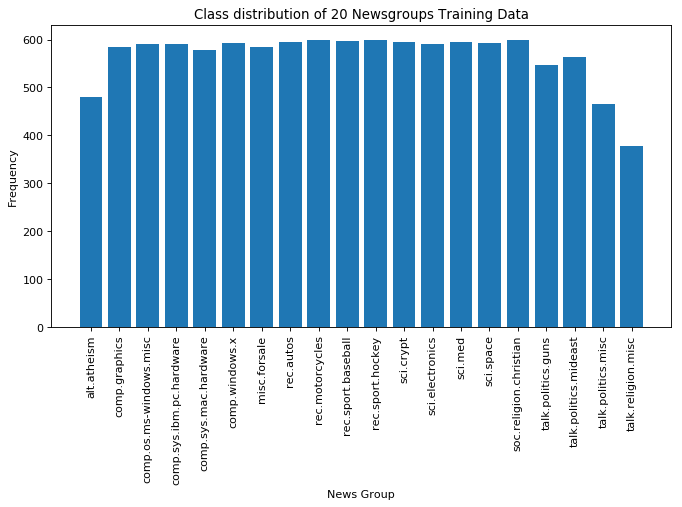

In [8]:
# Training data class distribution
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(targets_str,frequency)
plt.xticks(rotation=90)
plt.title('Class distribution of 20 Newsgroups Training Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')
plt.show()

We can see that all of the categories have decent amount of samples and doesn't have high imbalance. 

### Importing the 20newsgroup test data

In [9]:
# mydata_test = fetch_20newsgroups(subset='test', shuffle=True)
mydata_test = fetch_20newsgroups(subset='test', shuffle=True, remove = ('headers', 'footers', 'quotes'))

In [10]:
print('Testing data size:', len(mydata_test['data']))

Testing data size: 7532


In [11]:
# Finding frequency of each category
targets_test, frequency_test = np.unique(mydata_test.target, return_counts=True)
targets_test_str = np.array(mydata_test.target_names)
print(list(zip(targets_test_str, frequency_test)))

[('alt.atheism', 319), ('comp.graphics', 389), ('comp.os.ms-windows.misc', 394), ('comp.sys.ibm.pc.hardware', 392), ('comp.sys.mac.hardware', 385), ('comp.windows.x', 395), ('misc.forsale', 390), ('rec.autos', 396), ('rec.motorcycles', 398), ('rec.sport.baseball', 397), ('rec.sport.hockey', 399), ('sci.crypt', 396), ('sci.electronics', 393), ('sci.med', 396), ('sci.space', 394), ('soc.religion.christian', 398), ('talk.politics.guns', 364), ('talk.politics.mideast', 376), ('talk.politics.misc', 310), ('talk.religion.misc', 251)]


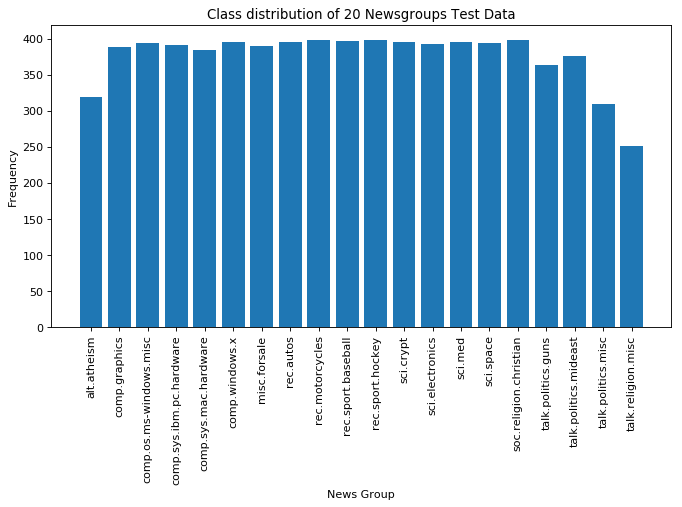

In [12]:
# Testing data class distribution
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(targets_test_str,frequency_test)
plt.xticks(rotation=90)
plt.title('Class distribution of 20 Newsgroups Test Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')
plt.show()

### Data Preparation: 

We will perform preparation steps such as Tokenization, Convert everything to lowercase, Removing stopwords, Stemming, Lemmatizing, and converting text data to a vector representation

In [13]:
mydata_train_df = pd.DataFrame({'data': mydata_train.data, 'target': mydata_train.target})
mydata_train_df.head()

,data,target
0,I was wondering if anyone out there could enli...,7
1,A fair number of brave souls who upgraded thei...,4
2,"well folks, my mac plus finally gave up the gh...",4
3,\nDo you have Weitek's address/phone number? ...,1
4,"From article <C5owCB.n3p@world.std.com>, by to...",14


In [14]:
# Text preprocessing steps - remove numbers, captial letters and punctuation
import re
import string

alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

mydata_train_df['data'] = mydata_train_df.data.map(alphanumeric).map(punc_lower)
mydata_train_df.head()

,data,target
0,i was wondering if anyone out there could enli...,7
1,a fair number of brave souls who upgraded thei...,4
2,well folks my mac plus finally gave up the gh...,4
3,\ndo you have weitek s address phone number ...,1
4,from article world std com by tombaker ...,14


In [15]:
# Preparing test data
mydata_test_df = pd.DataFrame({'data': mydata_test.data, 'target': mydata_test.target})
mydata_test_df.head()

,data,target
0,I am a little confused on all of the models of...,7
1,I'm not familiar at all with the format of the...,5
2,"\nIn a word, yes.\n",0
3,\nThey were attacking the Iraqis to drive them...,17
4,\nI've just spent two solid months arguing tha...,19


In [16]:
# Text preprocessing steps - remove numbers, captial letters and punctuation
alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

mydata_test_df['data'] = mydata_test_df.data.map(alphanumeric).map(punc_lower)
mydata_test_df.head()

,data,target
0,i am a little confused on all of the models of...,7
1,i m not familiar at all with the format of the...,5
2,\nin a word yes \n,0
3,\nthey were attacking the iraqis to drive them...,17
4,\ni ve just spent two solid months arguing tha...,19


### Count Vectorizer

In [17]:
# Extracting features from text files
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words='english')

X_train_cv = count_vect.fit_transform(mydata_train_df.data)  # fit_transform learns the vocab and one-hot encodes
X_test_cv = count_vect.transform(mydata_test_df.data) # transform uses the same vocab and one-hot encodes

print(X_train_cv.shape)
print(type(X_train_cv))

(11314, 67822)
<class 'scipy.sparse.csr.csr_matrix'>


In [18]:
X_train_cv_df = pd.DataFrame(X_train_cv.todense())
X_train_cv_df.columns = sorted(count_vect.vocabulary_)
X_train_cv_df.head()

,aa,aaa,aaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaauuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuugggggggggggggggg,aaah,aaahh,aaahhhh,aaai,aacc,aachen,...,zznkjz,zznkzz,zznp,zzrk,zzz,zzzoh,zzzzzz,zzzzzzt,³ation,ýé
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF Vectorizer

In [19]:
# Creating a document-term matrix using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfV = TfidfVectorizer(stop_words='english') 
# tfidfV = TfidfVectorizer(ngram_range=(1, 2), binary =True, stop_words='english') 

X_train_tfidfV = tfidfV.fit_transform(mydata_train_df.data) # fit_transform learns the vocab and one-hot encodes 
X_test_tfidfV = tfidfV.transform(mydata_test_df.data) # transform uses the same vocab and one-hot encodes 

# print the dimensions of the training set (text messages, terms) 
print(X_train_tfidfV.shape)
print(type(X_train_tfidfV))

(11314, 67822)
<class 'scipy.sparse.csr.csr_matrix'>


In [20]:
X_train_tfidfV_df = pd.DataFrame(X_train_tfidfV.todense())
X_train_tfidfV_df.columns = sorted(tfidfV.vocabulary_)
X_train_tfidfV_df.head()

,aa,aaa,aaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaauuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuugggggggggggggggg,aaah,aaahh,aaahhhh,aaai,aacc,aachen,...,zznkjz,zznkzz,zznp,zzrk,zzz,zzzoh,zzzzzz,zzzzzzt,³ation,ýé
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Classification Models

In [21]:
%%time
# Use a Naive Bayes model 
from sklearn.naive_bayes import MultinomialNB 

mnb = MultinomialNB() 

# Train the model 
y_train = mydata_train_df.target
mnb.fit(X_train_cv, y_train) 

Wall time: 88.7 ms


In [22]:
# Take the model that was trained on the X_train_cv data and apply it to the X_test_cv data 
y_pred_cv_mnb = mnb.predict(X_test_cv) 
y_pred_cv_mnb # The output is all of the predictions

array([ 7,  1, 15, ..., 15,  3, 15])

In [23]:
from sklearn.metrics import classification_report, accuracy_score

y_test = mydata_test_df.target
print(accuracy_score(y_test, y_pred_cv_mnb))
print(classification_report(y_test, y_pred_cv_mnb))

0.6399362719065321
              precision    recall  f1-score   support

           0       0.60      0.36      0.45       319
           1       0.57      0.70      0.63       389
           2       0.67      0.01      0.02       394
           3       0.50      0.71      0.58       392
           4       0.72      0.58      0.64       385
           5       0.58      0.80      0.67       395
           6       0.85      0.66      0.75       390
           7       0.82      0.70      0.76       396
           8       0.90      0.65      0.75       398
           9       0.93      0.76      0.84       397
          10       0.58      0.92      0.71       399
          11       0.58      0.78      0.66       396
          12       0.67      0.49      0.57       393
          13       0.83      0.79      0.81       396
          14       0.76      0.75      0.76       394
          15       0.48      0.90      0.63       398
          16       0.55      0.65      0.60       364
        

## Using pipeline now onwards to do the modeling

## I. Not using Stemming and Lemmatization 

### 1. Terms in TF-IDF Vectorizer are unigrams (single words)
With TfidfVectorizer we can extract "bag of words" from the text and apply TF-IDF (term frequency - inverse document frequency) weights. Experimentaly we found that applying sublinear tf scaling (1 + log(tf)) improves overall results. We will first extract only unigrams from the text data to form the vectorizer.

### A. Using Multinominal Naive Bayes Model

In [24]:
%%time
# Performance of NB Classifier with No Stemming & Lemmatization
text_clf = Pipeline([
        ('vect', TfidfVectorizer(stop_words='english', sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', MultinomialNB())])  # MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print(text_clf.score(mydata_test_df.data, mydata_test_df.target))
# print(classification_report(mydata_test_df.target, text_clf.predict(mydata_test_df.data)))

0.6692777482740307
Wall time: 3.24 s


### B. Using Logistic Regression Model

In [25]:
%%time
# Performance of LR Classifier with No Stemming & Lemmatization
text_clf = Pipeline([
        ('vect', TfidfVectorizer(stop_words='english', sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', LogisticRegression())])  # MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print(text_clf.score(mydata_test_df.data, mydata_test_df.target))
# print(classification_report(mydata_test_df.target, text_clf.predict(mydata_test_df.data)))

C:\Users\shahr\AnacondaPython3.6\Anaconda3\envs\IDS566python3.5\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shahr\AnacondaPython3.6\Anaconda3\envs\IDS566python3.5\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.6895910780669146
Wall time: 6.87 s


**Performing grid search on the 'penalty' parameter of Logistic Regression Classifier. We get best performance when L2-norm is used in the penalization.**

In [58]:
%%time
# Performing Grid Search to find best LR parameters
pipeline = Pipeline([
        ('vect', TfidfVectorizer(stop_words='english', sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', LogisticRegression())])  # MultinomialNB, LogisticRegression, SGDClassifier

parameters = {
       'clf__penalty': ('l1', 'l2')
}

grid_search = GridSearchCV(pipeline, parameters)
grid_search.fit(mydata_train_df.data, mydata_train_df.target)

C:\Users\shahr\AnacondaPython3.6\Anaconda3\envs\IDS566python3.5\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\shahr\AnacondaPython3.6\Anaconda3\envs\IDS566python3.5\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shahr\AnacondaPython3.6\Anaconda3\envs\IDS566python3.5\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Wall time: 44.8 s


In [59]:
# grid_search.cv_results_
print('Best training score %0.4f' % grid_search.best_score_)

Best score 0.7327


In [60]:
print('Best parameters = ')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

Best parameters = 
clf__penalty: 'l2'


In [61]:
# Test Accuracy
grid_search.best_estimator_.score(mydata_test_df.data, mydata_test_df.target)

0.6895910780669146

### C. Using Stochastic Gradient Descent Classifier Model

In [26]:
%%time
# Performance of SGD Classifier with No Stemming & Lemmatization
random.seed(1)
text_clf = Pipeline([
        ('vect', TfidfVectorizer(stop_words='english', sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', SGDClassifier())])  # MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print(text_clf.score(mydata_test_df.data, mydata_test_df.target))
# print(classification_report(mydata_test_df.target, text_clf.predict(mydata_test_df.data)))

C:\Users\shahr\AnacondaPython3.6\Anaconda3\envs\IDS566python3.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.69676048858205
Wall time: 3.48 s


### D. Using k Nearest Neighbors Model

In [68]:
%%time
# Performance of kNN Classifier with No Stemming & Lemmatization
text_clf = Pipeline([
        ('vect', TfidfVectorizer(stop_words='english', sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', KNeighborsClassifier(n_neighbors=100))])  # MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print(text_clf.score(mydata_test_df.data, mydata_test_df.target))
# print(classification_report(mydata_test_df.target, text_clf.predict(mydata_test_df.data)))

0.055098247477429634
Wall time: 7.06 s


**Performing grid search on the 'n_neighbors' and 'weights' parameters of kNN Classifier. We get best performance when n_neighbors is set to 5 and distance weights is used.**

In [62]:
%%time
# Performing Grid Search to find best kNN parameters
pipeline = Pipeline([
        ('vect', TfidfVectorizer(stop_words='english', sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', KNeighborsClassifier())])  # MultinomialNB, LogisticRegression, SGDClassifier

parameters = {
       'clf__n_neighbors': (5, 10, 100, 200),
       'clf__weights': ('uniform', 'distance')
}

grid_search = GridSearchCV(pipeline, parameters)
grid_search.fit(mydata_train_df.data, mydata_train_df.target)

C:\Users\shahr\AnacondaPython3.6\Anaconda3\envs\IDS566python3.5\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 2min 53s


In [63]:
# grid_search.cv_results_
print('Best training score %0.4f' % grid_search.best_score_)

Best training score 0.1091


In [64]:
print('Best parameters = ')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

Best parameters = 
clf__n_neighbors: 5
clf__weights: 'distance'


In [65]:
# Test Accuracy
grid_search.best_estimator_.score(mydata_test_df.data, mydata_test_df.target)

0.08828996282527882

### 2. Terms in TF-IDF Vectorizer are unigrams and bigrams, and values are binary values
Now we will extract unigrams as well as bigrams from the text to form the TF-IDF vectorizer.

### A. Using Multinominal Naive Bayes Model

In [28]:
%%time
# Performance of NB Classifier with No Stemming & Lemmatization, and ngram_range = (1,2)
text_clf = Pipeline([
        ('vect', TfidfVectorizer(stop_words='english', ngram_range = (1,2), binary = True, sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', MultinomialNB())])  # BernoulliNB, MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print(text_clf.score(mydata_test_df.data, mydata_test_df.target))
# print(classification_report(mydata_test_df.target, text_clf.predict(mydata_test_df.data)))

0.6557355284121084
Wall time: 10.5 s


### B. Using Logistic Regression Model

In [29]:
%%time
# Performance of LR Classifier with No Stemming & Lemmatization, and ngram_range = (1,2)
text_clf = Pipeline([
        ('vect', TfidfVectorizer(stop_words='english', ngram_range = (1,2), binary = True, sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', LogisticRegression())])  # BernoulliNB, MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print(text_clf.score(mydata_test_df.data, mydata_test_df.target))
# print(classification_report(mydata_test_df.target, text_clf.predict(mydata_test_df.data)))

C:\Users\shahr\AnacondaPython3.6\Anaconda3\envs\IDS566python3.5\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shahr\AnacondaPython3.6\Anaconda3\envs\IDS566python3.5\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.6833510355815189
Wall time: 26.2 s


**Performing grid search on the 'penalty' parameter of Logistic Regression Classifier. We get best performance when L2-norm is used in the penalization.**

In [69]:
%%time
# Performing Grid Search to find best LR parameters
pipeline = Pipeline([
        ('vect', TfidfVectorizer(stop_words='english', ngram_range = (1,2), binary = True, sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', LogisticRegression())])  # MultinomialNB, LogisticRegression, SGDClassifier

parameters = {
       'clf__penalty': ('l1', 'l2')
}

grid_search = GridSearchCV(pipeline, parameters)
grid_search.fit(mydata_train_df.data, mydata_train_df.target)

C:\Users\shahr\AnacondaPython3.6\Anaconda3\envs\IDS566python3.5\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\shahr\AnacondaPython3.6\Anaconda3\envs\IDS566python3.5\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shahr\AnacondaPython3.6\Anaconda3\envs\IDS566python3.5\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Wall time: 2min 35s


In [70]:
# grid_search.cv_results_
print('Best training score %0.4f' % grid_search.best_score_)

Best training score 0.7151


In [71]:
print('Best parameters = ')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

Best parameters = 
clf__penalty: 'l2'


In [72]:
# Test Accuracy
grid_search.best_estimator_.score(mydata_test_df.data, mydata_test_df.target)

0.6833510355815189

### C. Using Stochastic Gradient Descent Classifier Model

In [30]:
%%time
random.seed(1)
# Performance of SGD Classifier with No Stemming & Lemmatization, and ngram_range = (1,2)
text_clf = Pipeline([
        ('vect', TfidfVectorizer(stop_words='english', ngram_range = (1,2), binary = True, sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', SGDClassifier())])  # BernoulliNB, MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print(text_clf.score(mydata_test_df.data, mydata_test_df.target))
# print(classification_report(mydata_test_df.target, text_clf.predict(mydata_test_df.data)))

C:\Users\shahr\AnacondaPython3.6\Anaconda3\envs\IDS566python3.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.7039298990971854
Wall time: 11.2 s


### D. Using k Nearest Neighbors Model

In [31]:
%%time
# Performance of KNN Classifier with No Stemming & Lemmatization, and ngram_range = (1,2)
text_clf = Pipeline([
        ('vect', TfidfVectorizer(stop_words='english', ngram_range = (1,2), binary = True, sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', KNeighborsClassifier(n_neighbors=100))])  # BernoulliNB, MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print(text_clf.score(mydata_test_df.data, mydata_test_df.target))
# print(classification_report(mydata_test_df.target, text_clf.predict(mydata_test_df.data)))

0.05045140732873075
Wall time: 13.1 s


**Performing grid search on the 'n_neighbors' and 'weights' parameters of kNN Classifier. We get best performance when n_neighbors is set to 5 and distance weights is used.**

In [73]:
%%time
# Performing Grid Search to find best kNN parameters
pipeline = Pipeline([
        ('vect', TfidfVectorizer(stop_words='english', ngram_range = (1,2), binary = True, sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', KNeighborsClassifier())])  # MultinomialNB, LogisticRegression, SGDClassifier

parameters = {
       'clf__n_neighbors': (5, 10, 100, 200),
       'clf__weights': ('uniform', 'distance')
}

grid_search = GridSearchCV(pipeline, parameters)
grid_search.fit(mydata_train_df.data, mydata_train_df.target)

C:\Users\shahr\AnacondaPython3.6\Anaconda3\envs\IDS566python3.5\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 5min 48s


In [74]:
# grid_search.cv_results_
print('Best training score %0.4f' % grid_search.best_score_)

Best training score 0.1061


In [75]:
print('Best parameters = ')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

Best parameters = 
clf__n_neighbors: 5
clf__weights: 'distance'


In [76]:
# Test Accuracy
grid_search.best_estimator_.score(mydata_test_df.data, mydata_test_df.target)

0.07727031332979288

## II. Using Stemming
Now we'll use stemming technique, i.e. cutting the words to their root form. We use Snowball english stemmer algorithm from the nltk package. We define a class to represent the Snowball stemmer as follows.

In [108]:
stemmer = SnowballStemmer('english', ignore_stopwords=True)

class StemmedTfidfVectorizer(TfidfVectorizer):
    
    def __init__(self, stemmer, *args, **kwargs):
        super(StemmedTfidfVectorizer, self).__init__(*args, **kwargs)
        self.stemmer = stemmer
        
    def build_analyzer(self):
        analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
        return lambda doc: (self.stemmer.stem(word) for word in analyzer(doc.replace('\n', ' ')))

### 1. Terms in TF-IDF Vectorizer are unigrams (single words)
First we will apply stemming to extract only unigrams from the text data to form the vectorizer.
### A. Using Multinominal Naive Bayes Model

In [109]:
%%time
# Performance of NB Classifier with Stemming
text_clf = Pipeline([
        ('vect', StemmedTfidfVectorizer(stemmer=stemmer, stop_words='english', sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', MultinomialNB())])  # MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print(text_clf.score(mydata_test_df.data, mydata_test_df.target))
# print(classification_report(mydata_test_df.target, text_clf.predict(mydata_test_df.data)))

0.6648964418481147
Wall time: 29.9 s


### B. Using Logistic Regression Model

In [39]:
%%time
# Performance of LR Classifier with Stemming
text_clf = Pipeline([
        ('vect', StemmedTfidfVectorizer(stemmer=stemmer, stop_words='english', sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', LogisticRegression())])  # MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print(text_clf.score(mydata_test_df.data, mydata_test_df.target))
# print(classification_report(mydata_test_df.target, text_clf.predict(mydata_test_df.data)))

C:\Users\shahr\AnacondaPython3.6\Anaconda3\envs\IDS566python3.5\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shahr\AnacondaPython3.6\Anaconda3\envs\IDS566python3.5\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.6899893786510887
Wall time: 32.3 s


**Performing grid search on the 'penalty' parameter of Logistic Regression Classifier. We get best performance when L2-norm is used in the penalization.**

In [119]:
# %%time
# # Performing Grid Search to find best LR parameters
# pipeline = Pipeline([
#         ('vect', StemmedTfidfVectorizer(stemmer=stemmer, stop_words='english', sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
#         ('clf', LogisticRegression())])  # MultinomialNB, LogisticRegression, SGDClassifier

# parameters = {
#        'clf__penalty': ('l1', 'l2')
# }

# grid_search = GridSearchCV(pipeline, parameters)
# grid_search.fit(mydata_train_df.data, mydata_train_df.target)

In [120]:
# # grid_search.cv_results_
# print('Best training score %0.4f' % grid_search.best_score_)

In [121]:
# print('Best parameters = ')
# best_parameters = grid_search.best_estimator_.get_params()
# for param_name in sorted(parameters.keys()):
#     print("%s: %r" % (param_name, best_parameters[param_name]))

In [123]:
# # Test Accuracy
# grid_search.best_estimator_.score(mydata_test_df.data, mydata_test_df.target)

### C. Using Stochastic Gradient Descent Classifier Model

In [40]:
%%time
# Performance of SGD Classifier with Stemming
random.seed(1)
text_clf = Pipeline([
        ('vect', StemmedTfidfVectorizer(stemmer=stemmer, stop_words='english', sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', SGDClassifier())])  # MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print(text_clf.score(mydata_test_df.data, mydata_test_df.target))
# print(classification_report(mydata_test_df.target, text_clf.predict(mydata_test_df.data)))

C:\Users\shahr\AnacondaPython3.6\Anaconda3\envs\IDS566python3.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.701805629314923
Wall time: 28.9 s


### D. Using k Nearest Neighbors Model

In [114]:
%%time
# Performance of kNN Classifier with Stemming
text_clf = Pipeline([
        ('vect', StemmedTfidfVectorizer(stemmer=stemmer, stop_words='english', sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', KNeighborsClassifier(n_neighbors=5, weights='distance'))])  # MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print(text_clf.score(mydata_test_df.data, mydata_test_df.target))
# print(classification_report(mydata_test_df.target, text_clf.predict(mydata_test_df.data)))

0.08417419012214551
Wall time: 34.7 s


**Performing grid search on the 'n_neighbors' and 'weights' parameters of kNN Classifier. We get best performance when n_neighbors is set to 5 and distance weights is used.**

In [118]:
# %%time
# # Performing Grid Search to find best kNN parameters
# pipeline = Pipeline([
#         ('vect', StemmedTfidfVectorizer(stemmer=stemmer, stop_words='english', sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
#         ('clf', KNeighborsClassifier())])  # MultinomialNB, LogisticRegression, SGDClassifier

# parameters = {
#        'clf__n_neighbors': (5, 10, 100, 200),
#        'clf__weights': ('uniform', 'distance')
# }

# grid_search = GridSearchCV(pipeline, parameters)
# grid_search.fit(mydata_train_df.data, mydata_train_df.target)

In [ ]:
# # grid_search.cv_results_
# print('Best training score %0.4f' % grid_search.best_score_)

In [ ]:
# print('Best parameters = ')
# best_parameters = grid_search.best_estimator_.get_params()
# for param_name in sorted(parameters.keys()):
#     print("%s: %r" % (param_name, best_parameters[param_name]))

In [ ]:
# # Test Accuracy
# grid_search.best_estimator_.score(mydata_test_df.data, mydata_test_df.target)

### 2. Terms in TF-IDF Vectorizer are unigrams and bigrams, and values are binary values
Now we will extract unigrams as well as bigrams from the text to form the TF-IDF vectorizer.

### A. Using Multinominal Naive Bayes Model

In [42]:
%%time
# Performance of NB Classifier with Stemming, and ngram_range = (1,2)
text_clf = Pipeline([
        ('vect', StemmedTfidfVectorizer(stemmer=stemmer, stop_words='english', ngram_range = (1,2), binary = True, sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', MultinomialNB())])  # BernoulliNB, MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print(text_clf.score(mydata_test_df.data, mydata_test_df.target))
# print(classification_report(mydata_test_df.target, text_clf.predict(mydata_test_df.data)))

0.6558682952734998
Wall time: 1min 2s


### B. Using Logistic Regression Model

In [43]:
%%time
# Performance of LR Classifier with Stemming, and ngram_range = (1,2)
text_clf = Pipeline([
        ('vect', StemmedTfidfVectorizer(stemmer=stemmer, stop_words='english', ngram_range = (1,2), binary = True, sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', LogisticRegression())])  # BernoulliNB, MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print(text_clf.score(mydata_test_df.data, mydata_test_df.target))
# print(classification_report(mydata_test_df.target, text_clf.predict(mydata_test_df.data)))

C:\Users\shahr\AnacondaPython3.6\Anaconda3\envs\IDS566python3.5\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shahr\AnacondaPython3.6\Anaconda3\envs\IDS566python3.5\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.6833510355815189
Wall time: 1min 20s


**Performing grid search on the 'penalty' parameter of Logistic Regression Classifier. We get best performance when L2-norm is used in the penalization.**

In [116]:
# %%time
# # Performing Grid Search to find best LR parameters
# pipeline = Pipeline([
#         ('vect', StemmedTfidfVectorizer(stemmer=stemmer, stop_words='english', ngram_range = (1,2), binary = True, sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
#         ('clf', LogisticRegression())])  # MultinomialNB, LogisticRegression, SGDClassifier

# parameters = {
#        'clf__penalty': ('l1', 'l2')
# }

# grid_search = GridSearchCV(pipeline, parameters)
# grid_search.fit(mydata_train_df.data, mydata_train_df.target)

In [117]:
# # grid_search.cv_results_
# print('Best training score %0.4f' % grid_search.best_score_)

In [ ]:
# print('Best parameters = ')
# best_parameters = grid_search.best_estimator_.get_params()
# for param_name in sorted(parameters.keys()):
#     print("%s: %r" % (param_name, best_parameters[param_name]))

In [ ]:
# # Test Accuracy
# grid_search.best_estimator_.score(mydata_test_df.data, mydata_test_df.target)

### C. Using Stochastic Gradient Descent Classifier Model

In [124]:
%%time
random.seed(1)
# Performance of SGD Classifier with Stemming, and ngram_range = (1,2)
text_clf = Pipeline([
        ('vect', StemmedTfidfVectorizer(stemmer=stemmer, stop_words='english', ngram_range = (1,2), binary = True, sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', SGDClassifier())])  # BernoulliNB, MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print(text_clf.score(mydata_test_df.data, mydata_test_df.target))
print(classification_report(mydata_test_df.target, text_clf.predict(mydata_test_df.data)))

C:\Users\shahr\AnacondaPython3.6\Anaconda3\envs\IDS566python3.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.7079129049389272
              precision    recall  f1-score   support

           0       0.60      0.45      0.51       319
           1       0.67      0.69      0.68       389
           2       0.65      0.63      0.64       394
           3       0.71      0.66      0.68       392
           4       0.74      0.72      0.73       385
           5       0.79      0.75      0.77       395
           6       0.72      0.84      0.77       390
           7       0.80      0.71      0.75       396
           8       0.81      0.75      0.78       398
           9       0.86      0.82      0.84       397
          10       0.86      0.92      0.89       399
          11       0.80      0.75      0.77       396
          12       0.66      0.54      0.59       393
          13       0.79      0.81      0.80       396
          14       0.51      0.85      0.64       394
          15       0.59      0.88      0.71       398
          16       0.57      0.71      0.63       364
        

### D. Using k Nearest Neighbors Model

In [115]:
%%time
# Performance of KNN Classifier with Stemming, and ngram_range = (1,2)
text_clf = Pipeline([
        ('vect', StemmedTfidfVectorizer(stemmer=stemmer, stop_words='english', ngram_range = (1,2), binary = True, sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', KNeighborsClassifier(n_neighbors=5, weights='distance'))])  # BernoulliNB, MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print(text_clf.score(mydata_test_df.data, mydata_test_df.target))
# print(classification_report(mydata_test_df.target, text_clf.predict(mydata_test_df.data)))

0.0849707912904939
Wall time: 1min 17s


**Performing grid search on the 'n_neighbors' and 'weights' parameters of kNN Classifier. We get best performance when n_neighbors is set to 5 and distance weights is used.**

In [ ]:
# %%time
# # Performing Grid Search to find best kNN parameters
# pipeline = Pipeline([
#         ('vect', StemmedTfidfVectorizer(stemmer=stemmer, stop_words='english', ngram_range = (1,2), binary = True, sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
#         ('clf', KNeighborsClassifier())])  # MultinomialNB, LogisticRegression, SGDClassifier

# parameters = {
#        'clf__n_neighbors': (5, 10, 100, 200),
#        'clf__weights': ('uniform', 'distance')
# }

# grid_search = GridSearchCV(pipeline, parameters)
# grid_search.fit(mydata_train_df.data, mydata_train_df.target)

In [ ]:
# # grid_search.cv_results_
# print('Best training score %0.4f' % grid_search.best_score_)

In [ ]:
# print('Best parameters = ')
# best_parameters = grid_search.best_estimator_.get_params()
# for param_name in sorted(parameters.keys()):
#     print("%s: %r" % (param_name, best_parameters[param_name]))

In [ ]:
# # Test Accuracy
# grid_search.best_estimator_.score(mydata_test_df.data, mydata_test_df.target)

## III. Using Lemmatization
Now we apply lemmatization, i.e. getting grammatically correct normal form of the word with the use of morphology. We will use WordNetLemmatizer from nltk package and part-of-speech word tagging. We define the class LemmaTokenizer as follows.

In [46]:
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

### 1. Terms in TF-IDF Vectorizer are unigrams (single words)
First we will apply lemmetization to extract only unigrams from the text data to form the vectorizer.

### A. Using Multinominal Naive Bayes Model

In [47]:
%%time
# Performance of NB Classifier with Lemmatization
text_clf = Pipeline([
        ('vect', TfidfVectorizer(tokenizer=LemmaTokenizer(), stop_words='english', sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', MultinomialNB())])  # MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print(text_clf.score(mydata_test_df.data, mydata_test_df.target))
# print(classification_report(mydata_test_df.target, text_clf.predict(mydata_test_df.data)))

C:\Users\shahr\AnacondaPython3.6\Anaconda3\envs\IDS566python3.5\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


0.6687466808284652
Wall time: 33.5 s


### B. Using Logistic Regression Model

In [48]:
%%time
# Performance of LR Classifier with Lemmatization
text_clf = Pipeline([
        ('vect', TfidfVectorizer(tokenizer=LemmaTokenizer(), stop_words='english', sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', LogisticRegression())])  # MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print(text_clf.score(mydata_test_df.data, mydata_test_df.target))
# print(classification_report(mydata_test_df.target, text_clf.predict(mydata_test_df.data)))

C:\Users\shahr\AnacondaPython3.6\Anaconda3\envs\IDS566python3.5\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\shahr\AnacondaPython3.6\Anaconda3\envs\IDS566python3.5\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shahr\AnacondaPython3.6\Anaconda3\envs\IDS566python3.5\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.6901221455124801
Wall time: 34.9 s


**Performing grid search on the 'penalty' parameter of Logistic Regression Classifier. We get best performance when L2-norm is used in the penalization.**

In [85]:
%%time
# Performing Grid Search to find best LR parameters
pipeline = Pipeline([
        ('vect', TfidfVectorizer(tokenizer=LemmaTokenizer(), stop_words='english', sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', LogisticRegression())])  # MultinomialNB, LogisticRegression, SGDClassifier

parameters = {
       'clf__penalty': ('l1', 'l2')
}

grid_search = GridSearchCV(pipeline, parameters)
grid_search.fit(mydata_train_df.data, mydata_train_df.target)

C:\Users\shahr\AnacondaPython3.6\Anaconda3\envs\IDS566python3.5\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\shahr\AnacondaPython3.6\Anaconda3\envs\IDS566python3.5\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shahr\AnacondaPython3.6\Anaconda3\envs\IDS566python3.5\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Wall time: 4min 35s


In [86]:
# grid_search.cv_results_
print('Best training score %0.4f' % grid_search.best_score_)

Best training score 0.7330


In [87]:
print('Best parameters = ')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

Best parameters = 
clf__penalty: 'l2'


In [88]:
# Test Accuracy
grid_search.best_estimator_.score(mydata_test_df.data, mydata_test_df.target)

0.6901221455124801

### C. Using Stochastic Gradient Descent Classifier Model

In [49]:
%%time
# Performance of SGD Classifier with Lemmatization
random.seed(1)
text_clf = Pipeline([
        ('vect', TfidfVectorizer(tokenizer=LemmaTokenizer(), stop_words='english', sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', SGDClassifier())])  # MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print(text_clf.score(mydata_test_df.data, mydata_test_df.target))
# print(classification_report(mydata_test_df.target, text_clf.predict(mydata_test_df.data)))

C:\Users\shahr\AnacondaPython3.6\Anaconda3\envs\IDS566python3.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.6991502920870951
Wall time: 32 s


### D. Using k Nearest Neighbors Model

In [50]:
%%time
# Performance of kNN Classifier with Lemmatization
text_clf = Pipeline([
        ('vect', TfidfVectorizer(tokenizer=LemmaTokenizer(), stop_words='english', sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', KNeighborsClassifier(n_neighbors=100))])  # MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print(text_clf.score(mydata_test_df.data, mydata_test_df.target))
# print(classification_report(mydata_test_df.target, text_clf.predict(mydata_test_df.data)))

0.05204460966542751
Wall time: 35.7 s


**Performing grid search on the 'n_neighbors' and 'weights' parameters of kNN Classifier. We get best performance when n_neighbors is set to 5 and distance weights is used.**

In [94]:
%%time
# Performing Grid Search to find best kNN parameters
pipeline = Pipeline([
        ('vect', TfidfVectorizer(tokenizer=LemmaTokenizer(), stop_words='english', sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', KNeighborsClassifier())])  # MultinomialNB, LogisticRegression, SGDClassifier

parameters = {
       'clf__n_neighbors': (5, 10, 100, 200),
       'clf__weights': ('uniform', 'distance')
}

grid_search = GridSearchCV(pipeline, parameters)
grid_search.fit(mydata_train_df.data, mydata_train_df.target)

C:\Users\shahr\AnacondaPython3.6\Anaconda3\envs\IDS566python3.5\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\shahr\AnacondaPython3.6\Anaconda3\envs\IDS566python3.5\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\shahr\AnacondaPython3.6\Anaconda3\envs\IDS566python3.5\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\shahr\AnacondaPython3.6\Anacond

Wall time: 23min 43s


In [95]:
# grid_search.cv_results_
print('Best training score %0.4f' % grid_search.best_score_)

Best training score 0.1161


In [96]:
print('Best parameters = ')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

Best parameters = 
clf__n_neighbors: 5
clf__weights: 'distance'


In [97]:
# Test Accuracy
grid_search.best_estimator_.score(mydata_test_df.data, mydata_test_df.target)

0.08709506107275625

### 2. Terms in TF-IDF Vectorizer are unigrams and bigrams, and values are binary values
Now we will extract unigrams as well as bigrams from the text to form the TF-IDF vectorizer.

### A. Using Multinominal Naive Bayes Model

In [51]:
%%time
# Performance of NB Classifier with Lemmatization, and ngram_range = (1,2)
text_clf = Pipeline([
        ('vect', TfidfVectorizer(tokenizer=LemmaTokenizer(), stop_words='english', ngram_range = (1,2), binary = True, sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', MultinomialNB())])  # BernoulliNB, MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print(text_clf.score(mydata_test_df.data, mydata_test_df.target))
# print(classification_report(mydata_test_df.target, text_clf.predict(mydata_test_df.data)))

C:\Users\shahr\AnacondaPython3.6\Anaconda3\envs\IDS566python3.5\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


0.6571959638874137
Wall time: 38 s


### B. Using Logistic Regression Model

In [89]:
%%time
# Performance of LR Classifier with Lemmatization, and ngram_range = (1,2)
text_clf = Pipeline([
        ('vect', TfidfVectorizer(tokenizer=LemmaTokenizer(), stop_words='english', ngram_range = (1,2), binary = True, sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', LogisticRegression())])  # BernoulliNB, MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print(text_clf.score(mydata_test_df.data, mydata_test_df.target))
# print(classification_report(mydata_test_df.target, text_clf.predict(mydata_test_df.data)))

0.6836165693043016
Wall time: 57.7 s


**Performing grid search on the 'penalty' parameter of Logistic Regression Classifier. We get best performance when L2-norm is used in the penalization.**

In [90]:
%%time
# Performing Grid Search to find best LR parameters
pipeline = Pipeline([
        ('vect', TfidfVectorizer(tokenizer=LemmaTokenizer(), stop_words='english', ngram_range = (1,2), binary = True, sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', LogisticRegression())])  # MultinomialNB, LogisticRegression, SGDClassifier

parameters = {
       'clf__penalty': ('l1', 'l2')
}

grid_search = GridSearchCV(pipeline, parameters)
grid_search.fit(mydata_train_df.data, mydata_train_df.target)

C:\Users\shahr\AnacondaPython3.6\Anaconda3\envs\IDS566python3.5\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\shahr\AnacondaPython3.6\Anaconda3\envs\IDS566python3.5\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\shahr\AnacondaPython3.6\Anaconda3\envs\IDS566python3.5\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shahr\AnacondaPython3.6\Anaconda3\envs\IDS566python3.5\lib\site-packages\sklearn\linear_model\logistic.py:46

Wall time: 6min 18s


In [91]:
# grid_search.cv_results_
print('Best training score %0.4f' % grid_search.best_score_)

Best training score 0.7173


In [92]:
print('Best parameters = ')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

Best parameters = 
clf__penalty: 'l2'


In [93]:
# Test Accuracy
grid_search.best_estimator_.score(mydata_test_df.data, mydata_test_df.target)

0.6836165693043016

### C. Using Stochastic Gradient Descent Classifier Model

In [53]:
%%time
random.seed(1)
# Performance of SGD Classifier with Lemmatization, and ngram_range = (1,2)
text_clf = Pipeline([
        ('vect', TfidfVectorizer(tokenizer=LemmaTokenizer(), stop_words='english', ngram_range = (1,2), binary = True, sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', SGDClassifier())])  # BernoulliNB, MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print(text_clf.score(mydata_test_df.data, mydata_test_df.target))
# print(classification_report(mydata_test_df.target, text_clf.predict(mydata_test_df.data)))

C:\Users\shahr\AnacondaPython3.6\Anaconda3\envs\IDS566python3.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.7057886351566649
Wall time: 39.1 s


### D. Using k Nearest Neighbors Model

In [54]:
%%time
# Performance of KNN Classifier with Lemmatization, and ngram_range = (1,2)
text_clf = Pipeline([
        ('vect', TfidfVectorizer(tokenizer=LemmaTokenizer(), stop_words='english', ngram_range = (1,2), binary = True, sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', KNeighborsClassifier(n_neighbors=100))])  # BernoulliNB, MultinomialNB, LogisticRegression, SGDClassifier, KNeighborsClassifier

text_clf.fit(mydata_train_df.data, mydata_train_df.target)
print(text_clf.score(mydata_test_df.data, mydata_test_df.target))
# print(classification_report(mydata_test_df.target, text_clf.predict(mydata_test_df.data)))

0.05616038236856081
Wall time: 43.4 s


**Performing grid search on the 'n_neighbors' and 'weights' parameters of kNN Classifier. We get best performance when n_neighbors is set to 5 and distance weights is used.**

In [110]:
%%time
# Performing Grid Search to find best kNN parameters
pipeline = Pipeline([
        ('vect', TfidfVectorizer(tokenizer=LemmaTokenizer(), stop_words='english', ngram_range = (1,2), binary = True, sublinear_tf=True)), # CountVectorizer, TfidfVectorizer
        ('clf', KNeighborsClassifier())])  # MultinomialNB, LogisticRegression, SGDClassifier

parameters = {
       'clf__n_neighbors': (5, 10, 100, 200),
       'clf__weights': ('uniform', 'distance')
}

grid_search = GridSearchCV(pipeline, parameters)
grid_search.fit(mydata_train_df.data, mydata_train_df.target)

C:\Users\shahr\AnacondaPython3.6\Anaconda3\envs\IDS566python3.5\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\shahr\AnacondaPython3.6\Anaconda3\envs\IDS566python3.5\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\shahr\AnacondaPython3.6\Anaconda3\envs\IDS566python3.5\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\shahr\AnacondaPython3.6\Anacond

Wall time: 18min 13s


In [111]:
# grid_search.cv_results_
print('Best training score %0.4f' % grid_search.best_score_)

Best training score 0.1083


In [112]:
print('Best parameters = ')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

Best parameters = 
clf__n_neighbors: 5
clf__weights: 'distance'


In [113]:
# Test Accuracy
grid_search.best_estimator_.score(mydata_test_df.data, mydata_test_df.target)

0.08032395114179501